#### Prepare the tables. We use SALES_REFUNDS dataset and split it into train and test sets.

In [ ]:
# First we prepare the data for the scenario.
import pandas as pd
from hana_ml import dataframe

cc = dataframe.ConnectionContext(userkey="RaysKey")

ts_df = dataframe.create_dataframe_from_pandas(cc, pandas_df=pd.read_csv("./SALES_REFUNDS.csv"), table_name="SALES_REFUNDS", force=True).to_datetime({"BOOKING_DATE":"YYYY-MM-DD"}).sort_values(by="BOOKING_DATE").smart_save("SALES_REFUNDS", force=True)

100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


In [12]:
ts_df.head(150).save("SALES_REFUNDS_TRAIN", force=True)
ts_df.tail(30).select(ts_df.columns[0]).save("SALES_REFUNDS_PREDICT", force=True)

#### Setup Chatbot with HANA ML Toolkit

In [ ]:
from gen_ai_hub.proxy.langchain import init_llm
from hana_ai.agents.hanaml_rag_agent import HANAMLRAGAgent
from hana_ai.tools.toolkit import HANAMLToolkit


llm = init_llm('gpt-4.1', temperature=0.0, max_tokens=1800)
tools = HANAMLToolkit(cc, used_tools='all').get_tools()
chatbot = HANAMLRAGAgent(llm=llm, tools=tools, verbose=True, vector_store_type="hanadb", hana_connection_context=cc)
chatbot.clear_short_term_memory()
chatbot.clear_long_term_memory()

##### Fetch the data. The tool `fetch_data` in the toolkit is used to fetch the data from the HANA database.

In [14]:
chatbot.chat("Show me the last 10 records of data from SALES_REFUNDS")




> Entering new FormatSafeAgentExecutor chain...

Invoking: `fetch_data` with `{'table_name': 'SALES_REFUNDS', 'last_n': 10}`


| BOOKING_DATE   |   REFUNDS |
|:---------------|----------:|
| 2024-10-19     |  2771.56  |
| 2024-10-20     |  2300.83  |
| 2024-10-21     |  2260.7   |
| 2024-10-22     |     0     |
| 2024-10-23     |  8436.4   |
| 2024-10-24     |     0     |
| 2024-10-25     |   168.3   |
| 2024-10-26     |   503.582 |
| 2024-10-27     |  6201.68  |
| 2024-10-28     |     0     |Here are the last 10 records from the SALES_REFUNDS table:

| BOOKING_DATE   | REFUNDS   |
|:-------------- |----------:|
| 2024-10-19     | 2771.56   |
| 2024-10-20     | 2300.83   |
| 2024-10-21     | 2260.7    |
| 2024-10-22     | 0         |
| 2024-10-23     | 8436.4    |
| 2024-10-24     | 0         |
| 2024-10-25     | 168.3     |
| 2024-10-26     | 503.582   |
| 2024-10-27     | 6201.68   |
| 2024-10-28     | 0         |

Let me know if you need further analysis or visualization of this d

'Here are the last 10 records from the SALES_REFUNDS table:\n\n| BOOKING_DATE   | REFUNDS   |\n|:-------------- |----------:|\n| 2024-10-19     | 2771.56   |\n| 2024-10-20     | 2300.83   |\n| 2024-10-21     | 2260.7    |\n| 2024-10-22     | 0         |\n| 2024-10-23     | 8436.4    |\n| 2024-10-24     | 0         |\n| 2024-10-25     | 168.3     |\n| 2024-10-26     | 503.582   |\n| 2024-10-27     | 6201.68   |\n| 2024-10-28     | 0         |\n\nLet me know if you need further analysis or visualization of this data!'

##### Create a dataset report for the given data using the tool `ts_dataset_report`



> Entering new FormatSafeAgentExecutor chain...

Invoking: `ts_dataset_report` with `{'table_name': 'SALES_REFUNDS', 'key': 'BOOKING_DATE', 'endog': 'REFUNDS'}`




100%|██████████| 8/8 [00:56<00:00,  7.08s/it]



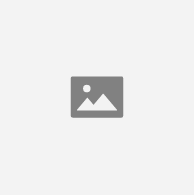

{"html_file": "/var/folders/8j/wl2lf7t510zcmdx9rhw8pdt00000gn/T/hanaml_report/SALES_REFUNDS_ts_report.html"}The dataset report for the SALES_REFUNDS table has been generated. It provides insights into the time series characteristics of your refunds data, such as trends, seasonality, and stationarity.

If you would like to view or download the report, let me know how you’d like to proceed!

> Finished chain.


'The dataset report for the SALES_REFUNDS table has been generated. It provides insights into the time series characteristics of your refunds data, such as trends, seasonality, and stationarity.\n\nIf you would like to view or download the report, let me know how you’d like to proceed!'

In [ ]:
chatbot.chat("Then create a dataset report for me on SALES_REFUNDS table")

##### Use `ts_check` to calculate the statistics of the dataset.

In [16]:
chatbot.chat("I want to check the time series data SALES_REFUNDS_TRAIN.")



> Entering new FormatSafeAgentExecutor chain...

Invoking: `fetch_data` with `{'table_name': 'SALES_REFUNDS_TRAIN', 'top_n': 1}`


| BOOKING_DATE   |   REFUNDS |
|:---------------|----------:|
| 2024-05-01     |         0 |
Invoking: `ts_check` with `{'table_name': 'SALES_REFUNDS_TRAIN', 'key': 'BOOKING_DATE', 'endog': 'REFUNDS'}`


Table structure: {"BOOKING_DATE": "DATE", "REFUNDS": "DOUBLE"}
Key: BOOKING_DATE
Endog: REFUNDS
Index: starts from 2024-05-01 to 2024-09-28. Time series length is 150
Intermittent Test: proportion of zero values is 0.14
Stationarity Test: The `stationary` is 1.The `kpss_stat` is 0.0457457.The `p-value` is 0.1.The `lags` is 13.The `number of observations` is 150.The `critical values` is {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}.
Trend Test: No trend.
Seasonality Test: The `type` is additive.The `period` is 28.The `acf` is 0.449686.
Available algorithms: Additive Model Forecast, Automatic Time Series Forecast
Here is the analysis of the SALES_

'Here is the analysis of the SALES_REFUNDS_TRAIN time series data:\n\n- Time range: 2024-05-01 to 2024-09-28 (150 records)\n- Proportion of zero values: 14% (mildly intermittent)\n- Stationarity: The series is stationary (KPSS test statistic is low, p-value is 0.1)\n- Trend: No trend detected\n- Seasonality: Additive seasonality detected with a period of 28 days (autocorrelation = 0.45)\n\nAvailable forecasting algorithms for this data include Additive Model Forecast and Automatic Time Series Forecast.\n\nLet me know if you want to proceed with forecasting, outlier detection, or any other analysis!'

In [17]:
chatbot.chat("key is BOOKING_DATE, endog is REFUNDS")



> Entering new FormatSafeAgentExecutor chain...

Invoking: `ts_check` with `{'table_name': 'SALES_REFUNDS_TRAIN', 'key': 'BOOKING_DATE', 'endog': 'REFUNDS'}`


Table structure: {"BOOKING_DATE": "DATE", "REFUNDS": "DOUBLE"}
Key: BOOKING_DATE
Endog: REFUNDS
Index: starts from 2024-05-01 to 2024-09-28. Time series length is 150
Intermittent Test: proportion of zero values is 0.14
Stationarity Test: The `stationary` is 1.The `kpss_stat` is 0.0457457.The `p-value` is 0.1.The `lags` is 13.The `number of observations` is 150.The `critical values` is {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}.
Trend Test: No trend.
Seasonality Test: The `type` is additive.The `period` is 28.The `acf` is 0.449686.
Available algorithms: Additive Model Forecast, Automatic Time Series Forecast
Here is the time series check for the SALES_REFUNDS_TRAIN data (key: BOOKING_DATE, endog: REFUNDS):

- Time range: 2024-05-01 to 2024-09-28 (150 records)
- Proportion of zero values: 14% (mildly intermittent)


'Here is the time series check for the SALES_REFUNDS_TRAIN data (key: BOOKING_DATE, endog: REFUNDS):\n\n- Time range: 2024-05-01 to 2024-09-28 (150 records)\n- Proportion of zero values: 14% (mildly intermittent)\n- Stationarity: The series is stationary (KPSS test statistic = 0.0457, p-value = 0.1)\n- Trend: No trend detected\n- Seasonality: Additive seasonality detected with a period of 28 days (autocorrelation = 0.45)\n\nAvailable forecasting algorithms for this data include Additive Model Forecast and Automatic Time Series Forecast.\n\nLet me know if you want to proceed with forecasting, outlier detection, or any other analysis!'

##### Model suggestion

In [18]:
chatbot.chat("could you suggest the predictive model for me based on the check result?")



> Entering new FormatSafeAgentExecutor chain...
Based on the time series check results for your SALES_REFUNDS_TRAIN data:

- The series is stationary (no significant trend detected)
- There is additive seasonality with a period of 28 days
- The data is mildly intermittent (14% zeros)

Here are model suggestions:

1. Additive Model Forecast (Prophet-style model)
   - Well-suited for stationary data with additive seasonality.
   - Handles seasonality explicitly and can model holidays or special events if needed.
   - Recommended if you want interpretable components (trend, seasonality, etc.).

2. Automatic Time Series Forecast (AutoML approach)
   - Automatically tests multiple algorithms (ARIMA, Exponential Smoothing, etc.) and selects the best one based on your data.
   - Good for quick, robust results without manual tuning.
   - Can handle a variety of time series patterns, including intermittent demand.

Recommendation:
Since your data is stationary with clear additive seasonality 

'Based on the time series check results for your SALES_REFUNDS_TRAIN data:\n\n- The series is stationary (no significant trend detected)\n- There is additive seasonality with a period of 28 days\n- The data is mildly intermittent (14% zeros)\n\nHere are model suggestions:\n\n1. Additive Model Forecast (Prophet-style model)\n   - Well-suited for stationary data with additive seasonality.\n   - Handles seasonality explicitly and can model holidays or special events if needed.\n   - Recommended if you want interpretable components (trend, seasonality, etc.).\n\n2. Automatic Time Series Forecast (AutoML approach)\n   - Automatically tests multiple algorithms (ARIMA, Exponential Smoothing, etc.) and selects the best one based on your data.\n   - Good for quick, robust results without manual tuning.\n   - Can handle a variety of time series patterns, including intermittent demand.\n\nRecommendation:\nSince your data is stationary with clear additive seasonality and some intermittency, both m

##### Use suggested model to train the model via the tool `xxx_fit_and_save`. 

In [19]:
chatbot.chat("Then please train the table using the additive model forecast with the period suggested by the check result for me and save as my_hana_ai_model")



> Entering new FormatSafeAgentExecutor chain...

Invoking: `additive_model_forecast_fit_and_save` with `{'fit_table': 'SALES_REFUNDS_TRAIN', 'name': 'my_hana_ai_model', 'period': 28, 'key': 'BOOKING_DATE', 'endog': 'REFUNDS'}`


{"trained_table": "SALES_REFUNDS_TRAIN", "model_storage_name": "my_hana_ai_model", "model_storage_version": 4}The additive model forecast has been trained on your SALES_REFUNDS_TRAIN table using a seasonality period of 28 days, as suggested by the time series check. The model is saved as my_hana_ai_model.

If you would like to proceed with making predictions, evaluating the model, or visualizing the results, please let me know!

> Finished chain.


'The additive model forecast has been trained on your SALES_REFUNDS_TRAIN table using a seasonality period of 28 days, as suggested by the time series check. The model is saved as my_hana_ai_model.\n\nIf you would like to proceed with making predictions, evaluating the model, or visualizing the results, please let me know!'

##### Predict on the model using `xxx_load_model_and_predict` tool.

In [20]:
chatbot.chat("I want to predict the SALES_REFUNDS_PREDICT using the trained model, key is BOOKING_DATE and endog is REFUNDS.")



> Entering new FormatSafeAgentExecutor chain...

Invoking: `additive_model_forecast_load_model_and_predict` with `{'predict_table': 'SALES_REFUNDS_PREDICT', 'name': 'my_hana_ai_model', 'key': 'BOOKING_DATE'}`




{"predicted_results_table": "my_hana_ai_model_4_PREDICTED_RESULT"}The prediction for the SALES_REFUNDS_PREDICT table has been completed using your trained additive model (my_hana_ai_model). The results are saved in the table my_hana_ai_model_4_PREDICTED_RESULT.

Would you like to view the predictions, visualize the forecast, or evaluate the model's performance? Let me know how you'd like to proceed!

> Finished chain.


"The prediction for the SALES_REFUNDS_PREDICT table has been completed using your trained additive model (my_hana_ai_model). The results are saved in the table my_hana_ai_model_4_PREDICTED_RESULT.\n\nWould you like to view the predictions, visualize the forecast, or evaluate the model's performance? Let me know how you'd like to proceed!"

In [21]:
chatbot.chat("show me all the predicted results")



> Entering new FormatSafeAgentExecutor chain...

Invoking: `fetch_data` with `{'table_name': 'my_hana_ai_model_4_PREDICTED_RESULT'}`


| BOOKING_DATE   |     YHAT |   YHAT_LOWER |   YHAT_UPPER |
|:---------------|---------:|-------------:|-------------:|
| 2024-05-20     | 1342.39  |    -2422.15  |      5181.26 |
| 2024-05-21     | 2676.91  |     -962.844 |      6603.86 |
| 2024-05-22     | 5090.39  |     1289.52  |      8838.22 |
| 2024-05-23     | 6129.94  |     2622.36  |      9720.06 |
| 2024-05-24     | 5985.64  |     2494.2   |      9529.4  |
| 2024-05-25     | 5511.45  |     1740.2   |      9321.86 |
| 2024-05-26     | 2702.12  |    -1107.02  |      6356.46 |
| 2024-06-17     | 1067.38  |    -2594.95  |      4902.27 |
| 2024-06-18     | 2401.9   |    -1463.74  |      6304.73 |
| 2024-06-19     | 4815.37  |     1457.13  |      8192.69 |
| 2024-06-20     | 5854.92  |     2058.79  |      9722.29 |
| 2024-06-21     | 5710.62  |     2393.48  |      9211.97 |
| 2024-06-22     | 5236

'Here are the predicted results from your trained additive model (my_hana_ai_model) for the SALES_REFUNDS_PREDICT table:\n\n| BOOKING_DATE   |   YHAT   | YHAT_LOWER | YHAT_UPPER |\n|:-------------- |---------:|-----------:|-----------:|\n| 2024-05-20     | 1342.39  | -2422.15   | 5181.26    |\n| 2024-05-21     | 2676.91  | -962.84    | 6603.86    |\n| 2024-05-22     | 5090.39  | 1289.52    | 8838.22    |\n| 2024-05-23     | 6129.94  | 2622.36    | 9720.06    |\n| 2024-05-24     | 5985.64  | 2494.20    | 9529.40    |\n| 2024-05-25     | 5511.45  | 1740.20    | 9321.86    |\n| 2024-05-26     | 2702.12  | -1107.02   | 6356.46    |\n| 2024-06-17     | 1067.38  | -2594.95   | 4902.27    |\n| 2024-06-18     | 2401.90  | -1463.74   | 6304.73    |\n| 2024-06-19     | 4815.37  | 1457.13    | 8192.69    |\n| ...            | ...      | ...        | ...        |\n\nEach row shows the predicted refund (YHAT) for a given date, along with the lower and upper bounds of the prediction interval.\n\nWou

##### Plot the predictions using the tool `forecast_line_plot`

In [22]:
result = chatbot.chat("Generate the line plot on the predicted results table and compared with the actual table SALES_REFUNDS")
print(result)
print(type(result))



> Entering new FormatSafeAgentExecutor chain...

Invoking: `forecast_line_plot` with `{'predict_result': 'my_hana_ai_model_4_PREDICTED_RESULT', 'actual_table_name': 'SALES_REFUNDS'}`




ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

##### Generate CAP artifacts using the tool `cap_artifacts`

In [ ]:
chatbot.chat("I want to generate CAP artifacts, the project name is my_project and output path is cap")



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "cap_artifacts",
  "action_input": {
    "name": "my_hana_ai_model",
    "version": 2,
    "project_name": "my_project",
    "output_dir": "cap"
  }
}
```
Observation: CAP artifacts generated successfully. Root directory: cap/my_project
Thought:The assistant has successfully generated the CAP artifacts for the model "my_hana_ai_model" version 2. The artifacts are stored in the directory "cap/my_project". The user can now use these artifacts for further tasks. Since the user's request has been fulfilled, I will provide this information as the final answer.

> Finished chain.


'The assistant has successfully generated the CAP artifacts for the model "my_hana_ai_model" version 2. The artifacts are stored in the directory "cap/my_project". The user can now use these artifacts for further tasks. Since the user\'s request has been fulfilled, I will provide this information as the final answer.'

In [ ]:
chatbot.chat("display all the models in simple mode directly")



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "list_models",
  "action_input": {
    "display_type": "simple"
  }
}
```
Observation:                NAME  VERSION LIBRARY  \
0  my_hana_ai_model        1     PAL   
1  my_hana_ai_model        2     PAL   

                                               CLASS           TIMESTAMP  \
0  hana_ml.algorithms.pal.tsa.additive_model_fore... 2025-05-19 16:43:58   
1  hana_ml.algorithms.pal.tsa.additive_model_fore... 2025-05-19 17:17:55   

  STORAGE_TYPE  MODEL_STORAGE_VER SCHEDULE  
0      default                  1       {}  
1      default                  1       {}  


> Finished chain.


NAME  VERSION LIBRARY  \
0  my_hana_ai_model        1     PAL   
1  my_hana_ai_model        2     PAL   

                                               CLASS           TIMESTAMP  \
0  hana_ml.algorithms.pal.tsa.additive_model_fore... 2025-05-19 16:43:58   
1  hana_ml.algorithms.pal.tsa.additive_model_fore... 2025-05-19 17:17:55   

  STORAGE_TYPE  MODEL_STORAGE_VER SCHEDULE  
0      default                  1       {}  
1      default                  1       {}